Toutes les cellules peuvent être exécutées simultanément en utilisant __Run>Run All Cells__ 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

## 1. Illustration de la loi des grands nombres

Premièrement, on génère $n$ variables aléatoires $(X_1,...,X_n)$ indépendantes de Bernoulli de paramètre $p$ 

(on pourra tester le code avec différentes valeurs de $p$ et différentes valeurs de $n$)

In [7]:
n = 500
p = 0.6
X = bernoulli.rvs(p,size=n)

A chaque nouvelle expérience,  on calcule la moyenne empirique
 $$\bar{X}_k=\frac{X_1+...+X_k}{k}.$$ 

Ces valeurs sont stockées dans un tableau "moyenne_empirique". Pour tout $k\in\{1,...,n\}$,
$\bar{X}_k$ est stockée dans la $k-1$-ième entrée de ce tableau.

In [8]:
moyenne_empirique = np.cumsum(X) / np.arange(1,n+1)

__Loi des grands nombres__

Il a été montré dans le cours que, pour tout $\beta>0$, pour tout $k\geq 1$, $$\mathbb{P}\left(|\bar{X}_k-p|\geq \beta\right)\leq \frac{1}{4k\beta^2}.$$
On peut donc choisir $\beta$ (en fonction de $k$) tel que cette probabilité soit inférieure à $5\%$. En effet, il suffit de considérer la suite $(\beta_k)$ définie par $$\beta_k=\sqrt{\frac{5}{{k}}},\quad \forall k\geq 1,$$ pour avoir $$\mathbb{P}\left( p-\beta_k< \bar{X}_k <p+\beta_k\right)\geq 95\%, \quad \forall k\geq 1.$$

Le code suivant génère les suites $(p-\beta_k)$ et $(p+\beta_k)$.

In [9]:
borne_sup=p+np.sqrt(5/np.arange(1,n+1))
borne_inf=p-np.sqrt(5/np.arange(1,n+1))

On peut maintenant tracer sur la même figure

 * la trajectoire de la moyenne empirique
 
 * la moyenne théorique (donnée par l'espérance)
 
 * les intervalles $[p-\beta_k,p+\beta_k]$ dans lesquels la moyenne empirique se trouve avec proba au moins $95\%$ pour chaque $k$


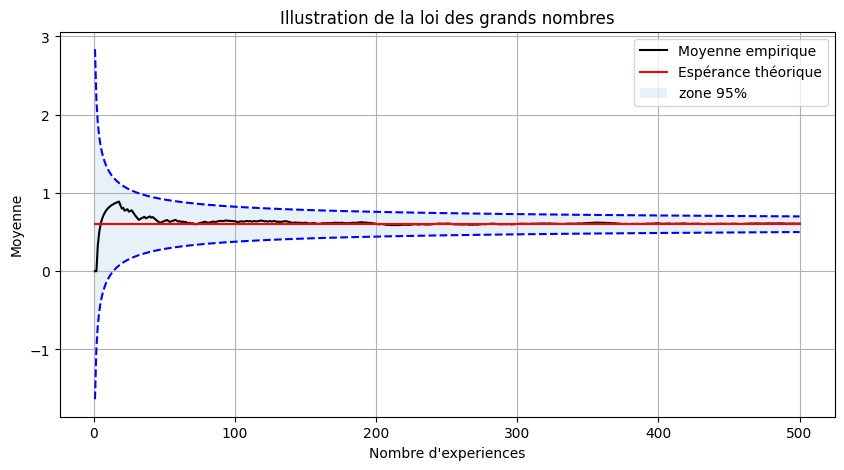

In [10]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,n+1),moyenne_empirique, 'k',  linewidth=1.5,label="Moyenne empirique")
plt.plot(np.arange(1,n+1),borne_sup,'b--')
plt.plot(np.arange(1,n+1),borne_inf,'b--')
plt.plot(np.arange(1,n+1), 0*np.arange(1,n+1)+p, color='red',  label="Espérance théorique")
plt.fill_between(np.arange(1,n+1), borne_inf,borne_sup, alpha=0.1, label="zone $95\\%$")
plt.xlabel("Nombre d'experiences")
plt.ylabel("Moyenne")
plt.title("Illustration de la loi des grands nombres")
plt.legend()
plt.grid(True)
plt.show()